In [1]:
import yt
from yt import YTArray
from yt import YTQuantity

from astropy import constants as const

import numpy as np

import matplotlib
%matplotlib inline
import matplotlib.pylab as plt
from matplotlib.colors import SymLogNorm, LogNorm

import palettable
import plotting_tools as pt
import yt_functions as ytf


yt : [INFO     ] 2019-10-29 07:06:40,736 Parameters: current_time              = 0
yt : [INFO     ] 2019-10-29 07:06:40,738 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2019-10-29 07:06:40,739 Parameters: domain_left_edge          = [-3. -3. -3.]
yt : [INFO     ] 2019-10-29 07:06:40,740 Parameters: domain_right_edge         = [3. 3. 3.]
yt : [INFO     ] 2019-10-29 07:06:40,741 Parameters: cosmological_simulation   = 0.0


yt : [INFO     ] 2019-10-29 09:15:45,189 Parameters: current_time              = 6.9999990828302
yt : [INFO     ] 2019-10-29 09:15:45,190 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2019-10-29 09:15:45,191 Parameters: domain_left_edge          = [-3. -3. -3.]
yt : [INFO     ] 2019-10-29 09:15:45,192 Parameters: domain_right_edge         = [3. 3. 3.]
yt : [INFO     ] 2019-10-29 09:15:45,193 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2019-10-29 09:15:45,215 Gathering a field list (this may take a moment.)
yt : [INFO     ] 2019-10-29 09:15:46,152 xlim = -3.000000 3.000000
yt : [INFO     ] 2019-10-29 09:15:46,153 ylim = -3.000000 3.000000
yt : [INFO     ] 2019-10-29 09:15:46,154 xlim = -3.000000 3.000000
yt : [INFO     ] 2019-10-29 09:15:46,155 ylim = -3.000000 3.000000
yt : [INFO     ] 2019-10-29 09:15:46,156 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800
yt : [INFO     ] 2019-10-29 09:15:46,173 Making a fixed resolution bu

0


yt : [INFO     ] 2019-10-29 09:15:49,781 Making a fixed resolution buffer of (y) 800 by 800


1


yt : [INFO     ] 2019-10-29 09:15:50,193 Projection completed
yt : [INFO     ] 2019-10-29 09:15:50,203 Making a fixed resolution buffer of (z) 800 by 800
yt : [INFO     ] 2019-10-29 09:15:50,633 Projection completed
yt : [INFO     ] 2019-10-29 09:15:50,641 Making a fixed resolution buffer of (density) 800 by 800
yt : [INFO     ] 2019-10-29 09:15:50,856 Making a fixed resolution buffer of (('gas', 'pressure')) 800 by 800
yt : [INFO     ] 2019-10-29 09:15:51,083 Projection completed
yt : [INFO     ] 2019-10-29 09:15:52,245 Parameters: current_time              = 6.999999053665
yt : [INFO     ] 2019-10-29 09:15:52,246 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2019-10-29 09:15:52,247 Parameters: domain_left_edge          = [-3. -3. -3.]
yt : [INFO     ] 2019-10-29 09:15:52,248 Parameters: domain_right_edge         = [3. 3. 3.]
yt : [INFO     ] 2019-10-29 09:15:52,249 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2019-10-29 09:15:52,268 Gathering 

0


yt : [INFO     ] 2019-10-29 09:15:56,707 Making a fixed resolution buffer of (y) 800 by 800


1


yt : [INFO     ] 2019-10-29 09:15:57,095 Projection completed
yt : [INFO     ] 2019-10-29 09:15:57,103 Making a fixed resolution buffer of (z) 800 by 800
yt : [INFO     ] 2019-10-29 09:15:57,518 Projection completed
yt : [INFO     ] 2019-10-29 09:15:57,524 Making a fixed resolution buffer of (density) 800 by 800
yt : [INFO     ] 2019-10-29 09:15:57,724 Making a fixed resolution buffer of (('gas', 'pressure')) 800 by 800
yt : [INFO     ] 2019-10-29 09:15:57,960 Projection completed


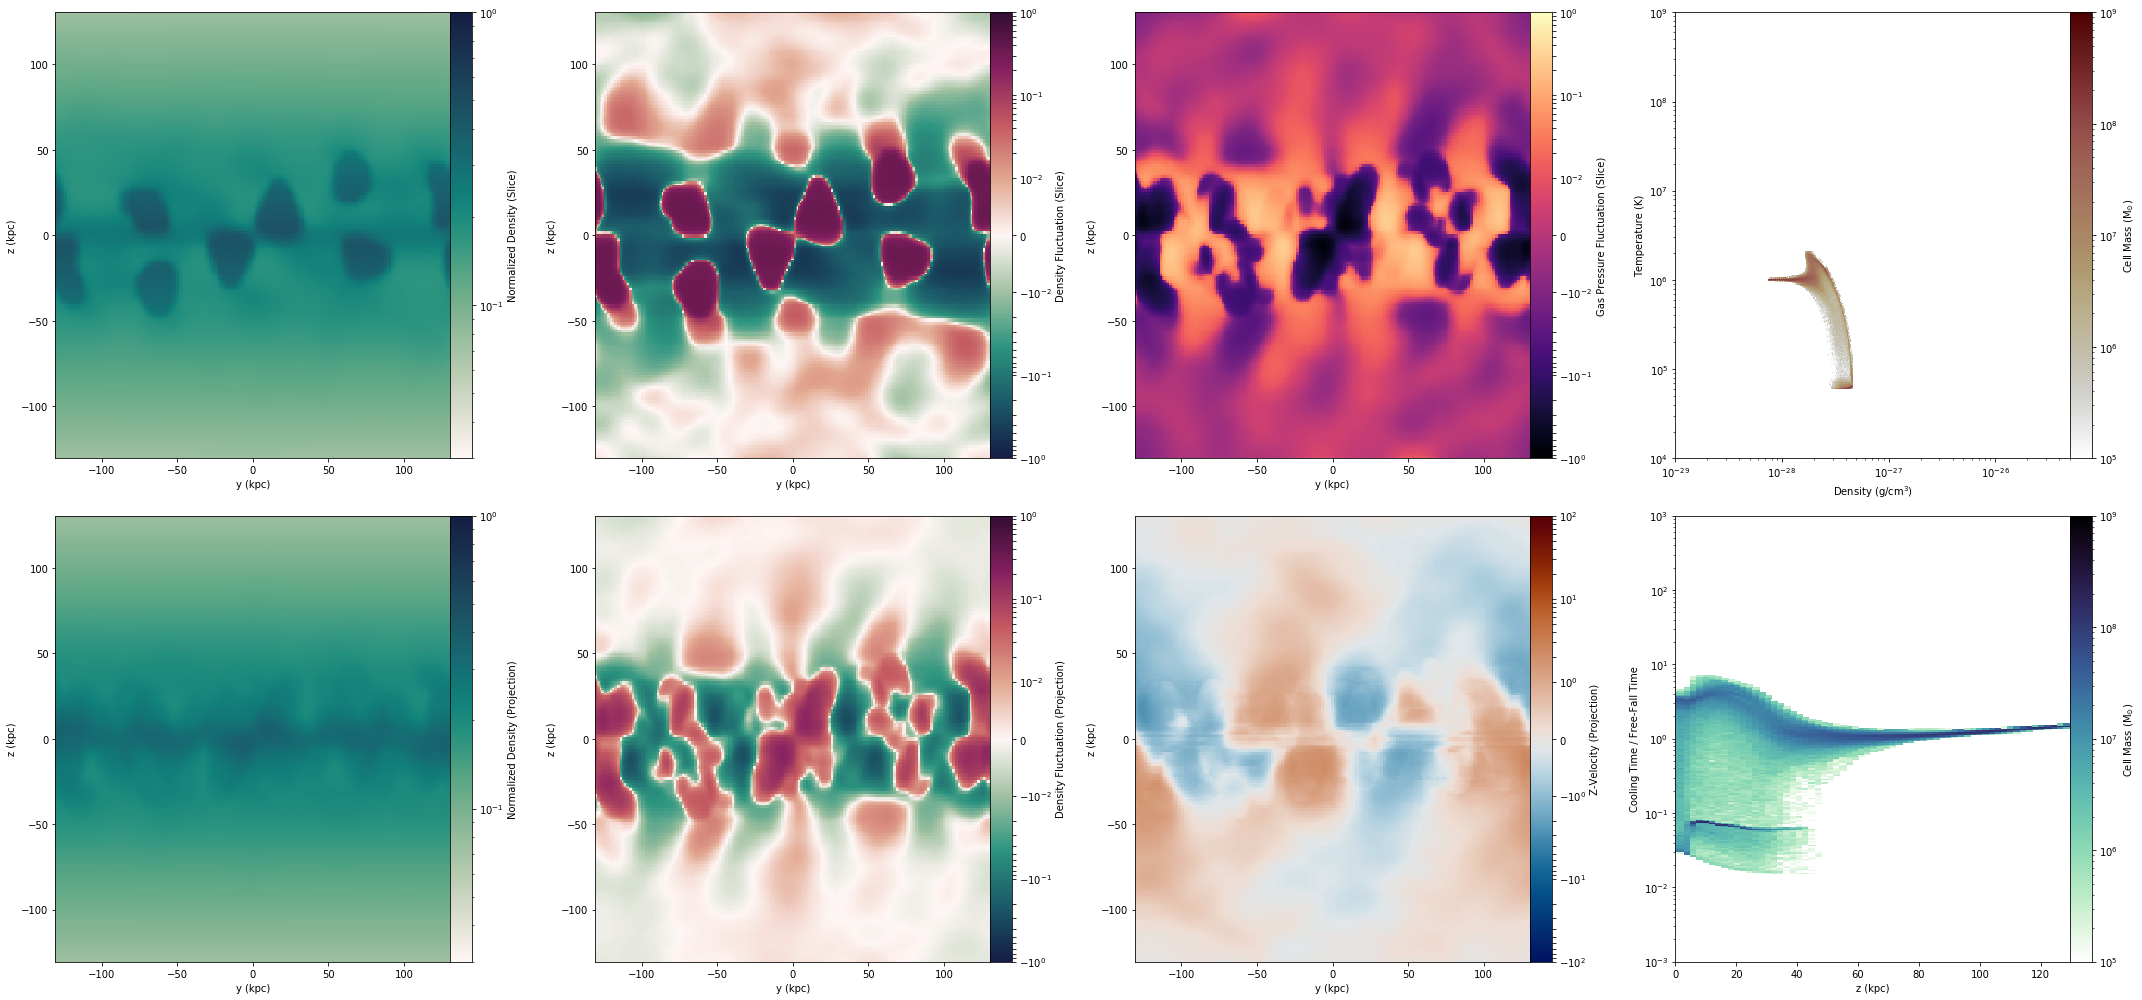

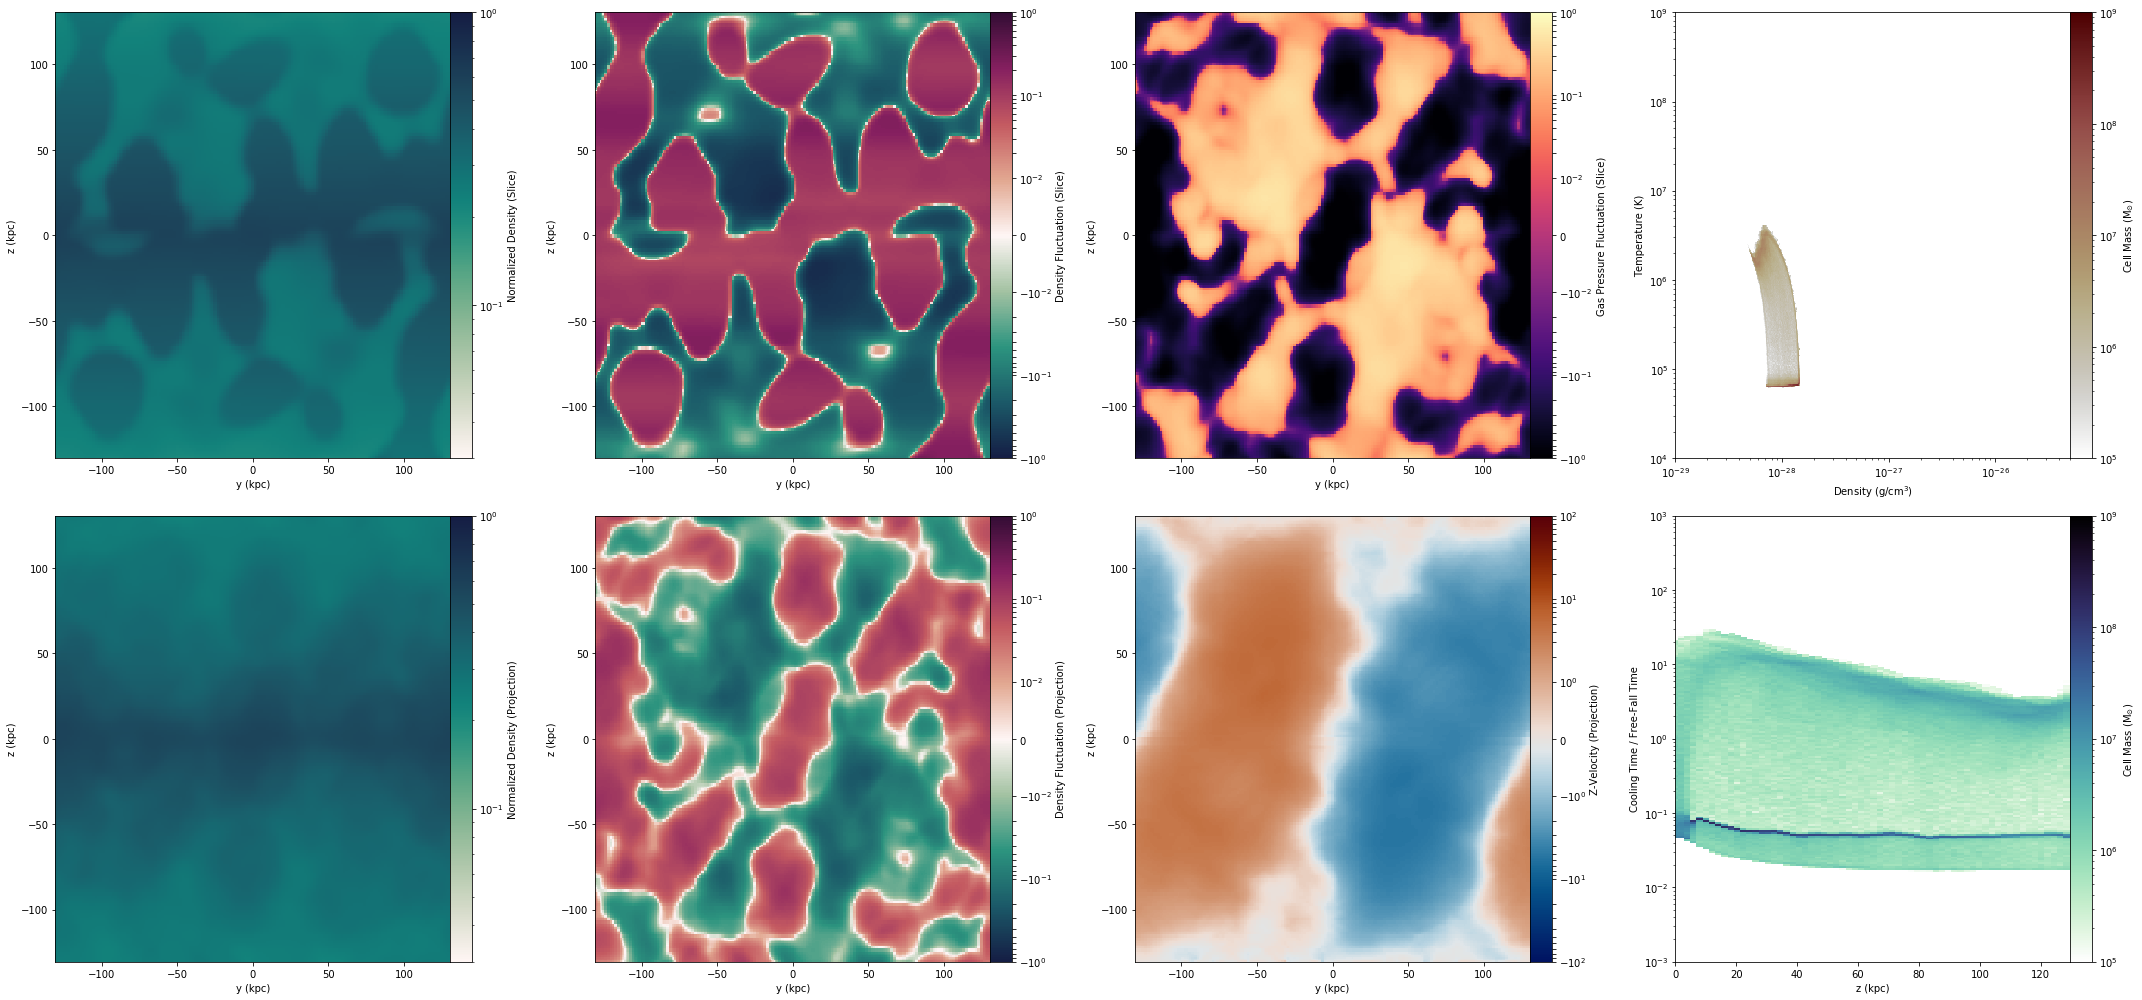

In [89]:
#folder = 'isothermal_tctf_3.0_beta_256.0_k_4.0'
#folder = 'isothermal_tctf_0.1_beta_4.0'
folder = 'isothermal_tctf_1.0_beta_10.0'

#folder = 'isentropic_tctf_3.0_beta_256.0_k_4.0'
#folder = 'isentropic_tctf_3.0_beta_256.0_k_32.0'

half_range = 1
rho0 = 1e-27
view = 'x'

i =0
#folder = 'isothermal_tctf_1.0_beta_10.0_cr_1.0'
folder = 'isocool_tctf_1.0'
ds = ytf.load('../../simulations/%s/DD%04d/DD%04d'%(folder, i, i))
fig, ax = pt.plot_density_slices(ds)

#i = 24
#folder = 'isothermal_tctf_1.0_beta_10.0_cr_3.0'
folder = 'isothermal_tctf_1.0'
ds2 = ytf.load('../../simulations/%s/DD%04d/DD%04d'%(folder, i, i))
fig, ax = pt.plot_density_slices(ds2, rho0 = 1e-27/4)



In [131]:
# note: calculate effective entropy and see if it decreases with height

def _gasentropy(field, data):
    gamma = 5./3.
    mh     = YTQuantity(const.m_p.cgs.value, 'g')
    mu = 1.22
    
    p = data[('gas', 'pressure')]
    n = data[('gas', 'density')] / (mu * mh)
    return  p / np.power(n, gamma)

def _crentropy(field, data):
    crgamma = 5./3.
    mh     = YTQuantity(const.m_p.cgs.value, 'g')
    mu = 1.22
    
    pcr = data[('gas', 'cr_pressure')]
    n = data[('gas', 'density')] / (mu * mh)
    return  pcr / np.power(n, crgamma)
 
    
i = 30
folder = 'isothermal_tctf_1.0_beta_10.0_cr_3.0'
ds = ytf.load('../../simulations/%s/DD%04d/DD%04d'%(folder, i, i))
ds.add_field(('gas', 'gas_entropy'), function = _gasentropy, units = 'cm**2 * keV', force_override = True)
ds.add_field(('gas', 'cr_entropy'), function = _crentropy, units = 'cm**2 * keV', force_override = True)
ad = ds.all_data()


yt : [INFO     ] 2019-10-29 11:21:24,472 Parameters: current_time              = 2.9999990210575
yt : [INFO     ] 2019-10-29 11:21:24,473 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2019-10-29 11:21:24,474 Parameters: domain_left_edge          = [-3. -3. -3.]
yt : [INFO     ] 2019-10-29 11:21:24,475 Parameters: domain_right_edge         = [3. 3. 3.]
yt : [INFO     ] 2019-10-29 11:21:24,476 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2019-10-29 11:21:24,532 Gathering a field list (this may take a moment.)
/home/ibutsky/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: Because 'sampling_type' not specified, yt will assume a cell 'sampling_type'
/home/ibutsky/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: Because 'sampling_type' not specified, yt will assume a cell 'sampling_type'


yt : [INFO     ] 2019-10-29 11:30:36,837 Parameters: current_time              = 3.4999990172426
yt : [INFO     ] 2019-10-29 11:30:36,838 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2019-10-29 11:30:36,839 Parameters: domain_left_edge          = [-3. -3. -3.]
yt : [INFO     ] 2019-10-29 11:30:36,840 Parameters: domain_right_edge         = [3. 3. 3.]
yt : [INFO     ] 2019-10-29 11:30:36,841 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2019-10-29 11:30:36,845 Gathering a field list (this may take a moment.)
/home/ibutsky/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Because 'sampling_type' not specified, yt will assume a cell 'sampling_type'
  after removing the cwd from sys.path.


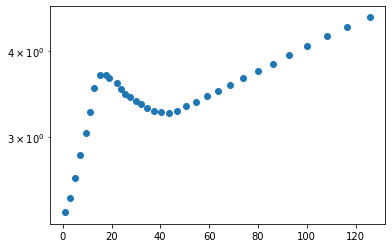

In [156]:

i = 35
folder = 'isothermal_tctf_1.0'#_beta_10.0_cr_0.1'
ds = ytf.load('../../simulations/%s/DD%04d/DD%04d'%(folder, i, i))
ds.add_field(('gas', 'gas_entropy'), function = _gasentropy, units = 'cm**2 * keV', force_override = True)
#ds.add_field(('gas', 'cr_entropy'), function = _crentropy, units = 'cm**2 * keV', force_override = True)
ad = ds.all_data()
p = yt.ProfilePlot(ad, ('gas', 'z'), [('gas', 'gas_entropy')])#, ('gas','cr_entropy')])#, ('gas', 'cr_eta')])
p.set_unit(('gas', 'z'), 'kpc')
p.set_log(('gas', 'z'), False)
profile = p.profiles[0]


ge = profile[('gas', 'gas_entropy')]
#ce = profile[('gas', 'cr_entropy')]
#eta = profile[('gas', 'cr_eta')]
z = ad[('gas', 'z')]



plt.scatter(profile.x, np.log(ge))# + eta * np.log(ce))
plt.yscale('log')

#plt.scatter(ad[('gas', 'z')].in_units('kpc'), np.log(ad[('gas', 'gas_entropy')]) \
 #           + ad[('gas', 'cr_eta')] * np.log(ad[('gas', 'cr_entropy')]))
#plt.yscale('log')

In [6]:
i = 0
ds1 = ytf.load('../../simulations/isothermal_tctf_1.0/DD%04d/DD%04d'%(i, i))
#ds2 = ytf.load('../../simulations/isothermal_tctf_1.0_beta_10.0/DD%04d/DD%04d'%(i, i))
ds2 = ytf.load('../../simulations/isothermal_tctf_1.0_beta_10.0_cr_3.0/DD%04d/DD%04d'%(i, i))
ad = ds1.all_data()
ad2 = ds2.all_data()

z = ad[('gas', 'z')].in_units('kpc')
ptot1 = ad[('gas', 'pressure')] + ad[('gas', 'magnetic_pressure')]
ptot2 = ad2[('gas', 'pressure')] + ad2[('gas', 'magnetic_pressure')] + ad2[('gas', 'cr_pressure')]

print("ptot1 / ptot2", ptot1/ ptot2)

print("pgas1 / pgas2", ad[('gas', 'pressure')] / ad2[('gas', 'pressure')])

print(ad2[('gas', 'cr_eta')], ad2[('gas', 'plasma_beta')])
print(ad2[('gas', 'pressure')] / ad2[('gas', 'magnetic_pressure')])
#print(ad[field] / ad2[field])

#ad2[('gas', 'cr_eta')]


yt : [INFO     ] 2019-10-29 07:17:57,835 Parameters: current_time              = 0
yt : [INFO     ] 2019-10-29 07:17:57,836 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2019-10-29 07:17:57,837 Parameters: domain_left_edge          = [-3. -3. -3.]
yt : [INFO     ] 2019-10-29 07:17:57,839 Parameters: domain_right_edge         = [3. 3. 3.]
yt : [INFO     ] 2019-10-29 07:17:57,840 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2019-10-29 07:17:58,088 Gathering a field list (this may take a moment.)
yt : [INFO     ] 2019-10-29 07:17:59,015 Parameters: current_time              = 0
yt : [INFO     ] 2019-10-29 07:17:59,016 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2019-10-29 07:17:59,017 Parameters: domain_left_edge          = [-3. -3. -3.]
yt : [INFO     ] 2019-10-29 07:17:59,018 Parameters: domain_right_edge         = [3. 3. 3.]
yt : [INFO     ] 2019-10-29 07:17:59,019 Parameters: cosmological_simulation   = 0.0
yt : [INFO

ptot1 / ptot2 [0.22493004 0.23304024 0.2414427  ... 0.2414427  0.23304024 0.22493004] dimensionless
pgas1 / pgas2 [0.92220966 0.95546136 0.98991134 ... 0.98991134 0.95546136 0.92220966] dimensionless
[2.999985 2.999985 2.999985 ... 2.999985 2.999985 2.999985] dimensionless [10.00005 10.00005 10.00005 ... 10.00005 10.00005 10.00005] dimensionless
[10.00005 10.00005 10.00005 ... 10.00005 10.00005 10.00005] dimensionless


(1e-15, 1e-13)

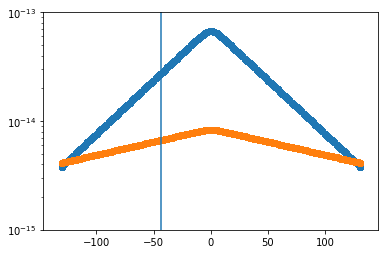

In [8]:
pgas1 = ad[('gas', 'pressure')]
pgas2 = ad2[('gas', 'pressure')]
plt.yscale('log')
plt.scatter(z, pgas1)
plt.scatter(z, pgas2)
#plt.scatter(z, ptot2 / 2 )
plt.axvline(-43.8)
plt.ylim(1e-15, 1e-13)

yt : [INFO     ] 2019-10-29 09:07:55,269 Parameters: current_time              = 0
yt : [INFO     ] 2019-10-29 09:07:55,270 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2019-10-29 09:07:55,271 Parameters: domain_left_edge          = [-3. -3. -3.]
yt : [INFO     ] 2019-10-29 09:07:55,272 Parameters: domain_right_edge         = [3. 3. 3.]
yt : [INFO     ] 2019-10-29 09:07:55,273 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2019-10-29 09:07:55,278 Gathering a field list (this may take a moment.)


1.068226171320224 kpc 591737640.9398675 yr
1.1522193040358992 kpc 0.0 yr
1.2428166995311272 kpc 0.0 yr
1.3405376417693828 kpc 0.0 yr
1.445942245287323 kpc 0.0 yr
1.559634665645758 kpc 0.0 yr
1.6822665623139064 kpc 0.0 yr
1.8145408338353994 kpc 0.0 yr
1.9572156466851798 kpc 0.0 yr
2.1111087809097917 kpc 0.0 yr
2.2771023174593 kpc 0.0 yr
2.45614769407758 kpc 0.0 yr
2.6492711587301954 kpc 0.0 yr
2.857579651827705 kpc 0.0 yr
3.082267150959974 kpc 594418612.8815851 yr
3.3246215145080873 kpc 0.0 yr
3.5860318633598975 kpc 0.0 yr
3.867996543039631 kpc 0.0 yr
4.172131711888545 kpc 0.0 yr
4.500180604522244 kpc 0.0 yr
4.854023523660796 kpc 0.0 yr
5.23568861760244 kpc 598935137.341158 yr
5.64736350511501 kpc 0.0 yr
6.091407814376366 kpc 0.0 yr
6.570366707834188 kpc 0.0 yr
7.086985470506632 kpc 604970529.3045015 yr
7.644225245340692 kpc 0.0 yr
8.24528000581983 kpc 0.0 yr
8.893594863104047 kpc 0.0 yr
9.592885812634831 kpc 611996027.3657125 yr
10.347161033388083 kpc 0.0 yr
11.16074386185757 kpc 61914

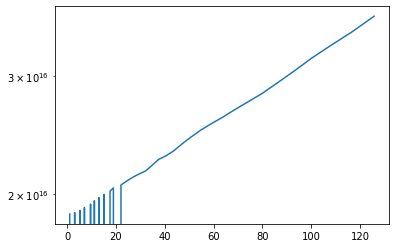

In [88]:
ds = ytf.load('../../simulations/isothermal_tctf_1.0_beta_10.0_cr_3.0/DD0000/DD0000')
ad = ds.all_data()
field = ('gas', 'cooling_time')
p = yt.ProfilePlot(ad, ('gas', 'z'), field)
p.set_unit(('gas', 'z'), 'kpc')
p.set_log(('gas', 'z'), False)
#p.show()

profile = p.profiles[0]
pz = profile.x
py = profile[field]

plt.semilogy(pz, py)#.in_units('yr'))
#plt.scatter(43.85, 9.86e-29)
for z, y in zip(pz, py):
    print(z, y.in_units('yr'))


In [72]:
def calculate_cooling_rate(T, Lambda0, T_power_law_index, smooth_factor = 0.02, Tmin = 5e4, Tmax = 1e8):
    # only the power law                                                                                                                                                    
    cooling_rate = Lambda0 * np.power(T, T_power_law_index)
    cooling_rate[T < Tmin] = Lambda0 * np.power(Tmin, T_power_law_index)
    cooling_rate[T > Tmax] = Lambda0 * np.power(Tmax, T_power_law_index)
    print(cooling_rate)

    logT = np.log10(T)
    logT_min = np.log10(Tmin)
    logT_max = np.log10(Tmax)

    # smooth the edges                                                                                                                                                      
    Tminscale =  (logT - logT_min) / (smooth_factor * logT_min)
    Tmaxscale = -(logT - logT_max) / (smooth_factor * logT_max)
    
    print(Tminscale, Tmaxscale)
    ymin = 1e-20 * Lambda0

    smooth_min = 1
    smooth_max = 1
    smooth_min = (np.tanh(Tminscale - 2.0) + 1.0) / 2. * (1.0 - ymin)  + ymin
    smooth_max = (np.tanh(Tmaxscale - 2.0) + 1.0) / 2. * (1.0 - ymin) + ymin
    print(smooth_min, smooth_max)
    return cooling_rate * smooth_min * smooth_max


Lambda0 = 3.059377e-18
T_power_law_index = -2./3.
T =YTArray([1.004153e+06], 'K')
n = 4.286636e-05 
cooling_rate = -5.606171e-31
gamma = 5./3.
kb     = YTQuantity(const.k_B.cgs.value, 'cm**2*g/s**2/K')
mh     = YTQuantity(const.m_p.cgs.value, 'g')
mu     = 1.22

eth = n * kb * T / (gamma - 1)
d_eth = np.power(n, 2) * calculate_cooling_rate(T, Lambda0, T_power_law_index)
print(d_eth)
#print(z.in_units('kpc'), rho, n, T, eth, d_eth, Lambda0, (eth/d_eth))
cooling_time = eth / d_eth

[3.05093581e-22] K**(-2/3)
[13.86293044] [12.48875069]
[1.] [1.]
[5.60617027e-31] K**(-2/3)


In [70]:
RadiativeCoolingFunctionConstant = Lambda0
temperature = T
number_density = n
RadiativeCoolingMinimumTemperature = 5e4
RadiativeCoolingMaximumTemperature = 1e8
RadiativeCoolingPowerLawIndex = -0.66667
RadiativeCoolingSmoothingFactor = 0.02
tiny_number = 1e-20
eq_cooling_function = RadiativeCoolingFunctionConstant * np.power(temperature, RadiativeCoolingPowerLawIndex)
if (temperature < RadiativeCoolingMinimumTemperature):
  eq_cooling_function = RadiativeCoolingFunctionConstant * np.power(RadiativeCoolingMinimumTemperature, RadiativeCoolingPowerLawIndex)
elif (temperature > RadiativeCoolingMaximumTemperature):
  eq_cooling_function = RadiativeCoolingFunctionConstant * np.power(RadiativeCoolingMaximumTemperature, RadiativeCoolingPowerLawIndex)

# smoothing the power law cooling function for T < Tmin and T > Tmax                                                               
Tmin_scale =  (np.log10(temperature) - np.log10(RadiativeCoolingMinimumTemperature))/ \
               np.log10(RadiativeCoolingMinimumTemperature) / RadiativeCoolingSmoothingFactor;
Tmax_scale = -(np.log10(temperature) - np.log10(RadiativeCoolingMaximumTemperature))/ \
               np.log10(RadiativeCoolingMaximumTemperature) / RadiativeCoolingSmoothingFactor;


eq_cooling_min = tiny_number * RadiativeCoolingFunctionConstant;
# "Tmin_scale - 2.0" is hard-coded, may change later. The other factors are physically motivated                                   
# smooth_min and smooth_max go from eq_cooling_min to 1.0                                                                          
smooth_min = (np.tanh(Tmin_scale - 2.0) + 1.0) / 2.0 * (1.0 - eq_cooling_min) + eq_cooling_min;
smooth_max = (np.tanh(Tmax_scale - 2.0) + 1.0) / 2.0 * (1.0 - eq_cooling_min) + eq_cooling_min;
print(smooth_min, smooth_max)

eq_cooling_function *= smooth_min * smooth_max;

[1.] [1.]


In [67]:
print(eq_cooling_function)
print(RadiativeCoolingFunctionConstant * np.power(temperature, -2./3.) *n *n)


[3.05079527e-22] K**(-66667/100000)
[5.60617028e-31] K**(-2/3)


In [148]:
reg = ds1.r[:, :, 1]
reg2 = ds2.r[:, :, 1]
reg[('gas', 'z')].in_units('kpc')
reg[('gas', 'pressure')] / (reg2[('gas', 'pressure')] * (1 + 0.1 + 3))


YTArray([0.99414034, 0.99414034, 0.99414034, ..., 0.99414034, 0.99414034,
         0.99414034]) (dimensionless)

yt : [INFO     ] 2019-10-17 12:43:19,651 Parameters: current_time              = 8.4999990045463
yt : [INFO     ] 2019-10-17 12:43:19,652 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2019-10-17 12:43:19,653 Parameters: domain_left_edge          = [-3. -3. -3.]
yt : [INFO     ] 2019-10-17 12:43:19,654 Parameters: domain_right_edge         = [3. 3. 3.]
yt : [INFO     ] 2019-10-17 12:43:19,655 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2019-10-17 12:43:19,677 Gathering a field list (this may take a moment.)
/simons/scratch/ibutsky/thermal_instabilities/analysis/yt_functions.py:39: UserWarning: Because 'sampling_type' not specified, yt will assume a cell 'sampling_type'
  display_name = 'External Acceleration Z', units = 'cm/s**2')
/simons/scratch/ibutsky/thermal_instabilities/analysis/yt_functions.py:42: UserWarning: Because 'sampling_type' not specified, yt will assume a cell 'sampling_type'
  display_name = 'Free Fall Time', units = 's')
/simo


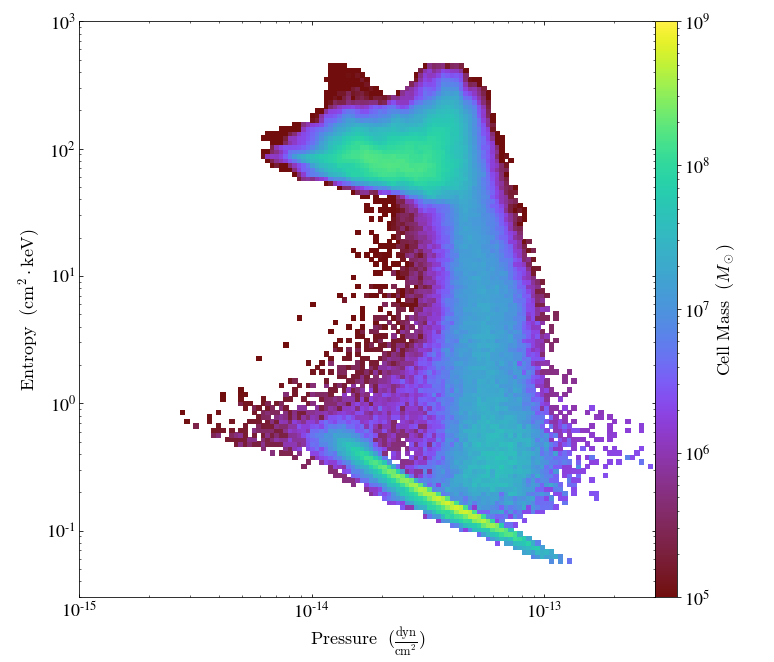

In [53]:
folder = 'isentropic_tctf_1.0'
folder = 'isothermal_tctf_1.0'
i = 85
ds = ytf.load('../../simulations/%s/DD%04d/DD%04d'%(folder, i, i))
ad = ds.all_data()

xfield = ('gas', 'pressure')
yfield = ('gas', 'entropy')
zfield = ('gas', 'cell_mass')
ph = yt.PhasePlot(ad, xfield, yfield, zfield, weight_field = None)
ph.set_unit(zfield, 'Msun')
ph.set_zlim(zfield, 1e5, 1e9)

ph.set_xlim(1e-15, 3e-13)
ph.set_ylim(3e-2, 1e3)
ph.show()

In [15]:
low = ds.domain_left_edge
dims = [128, 128, 128]
cube = ds.covering_grid(0, left_edge = ds.domain_left_edge, dims = dims, \
                        fields = [('gas', 'density'), ('gas', 'thermal_energy')])
                        

In [102]:
rho = cube[('gas', 'density')]

In [104]:
nx, ny, nz = rho.shape

In [105]:
nx

128